gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


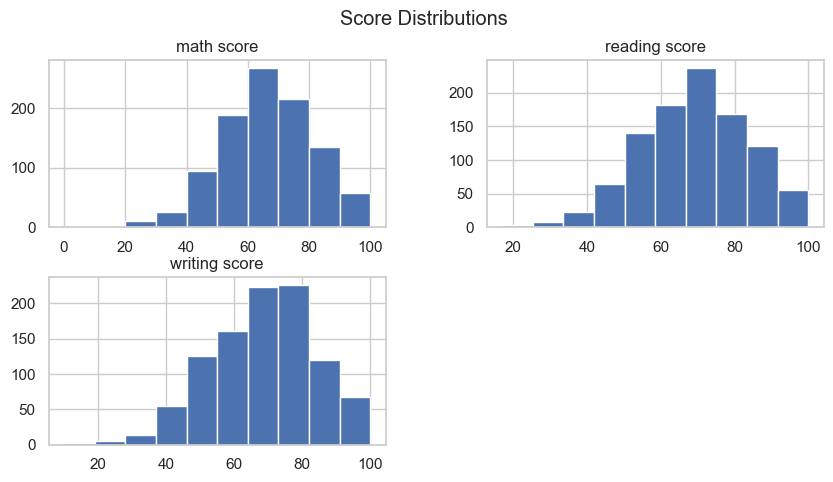

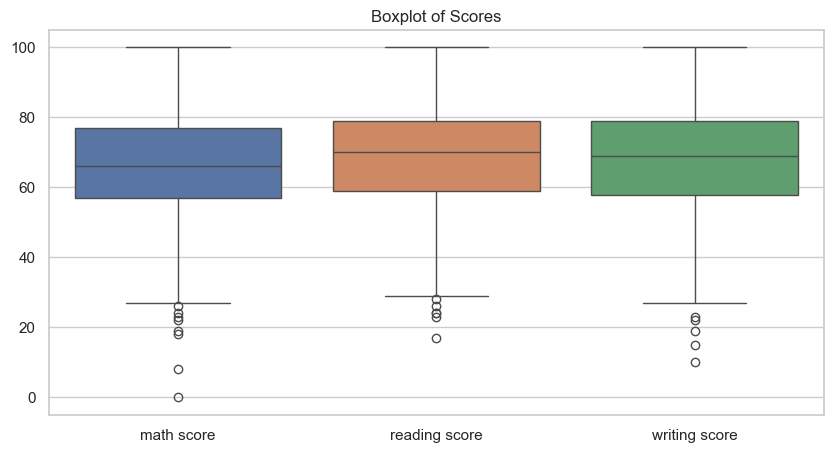

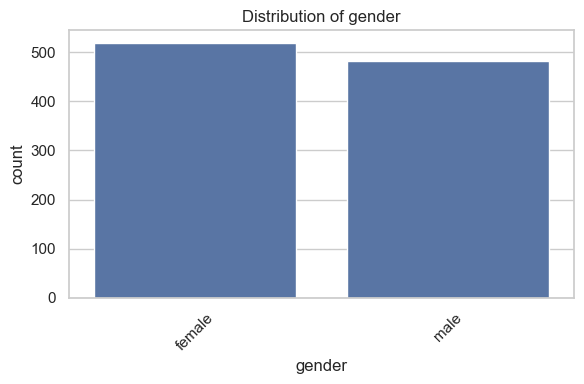

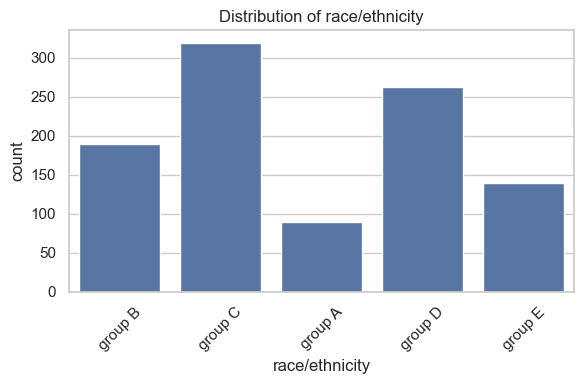

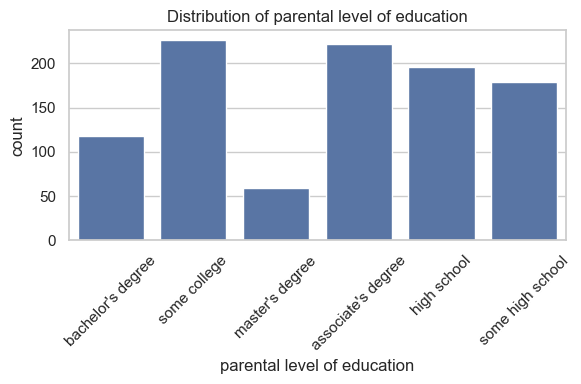

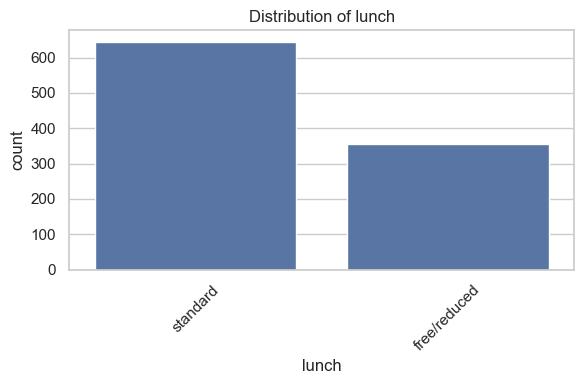

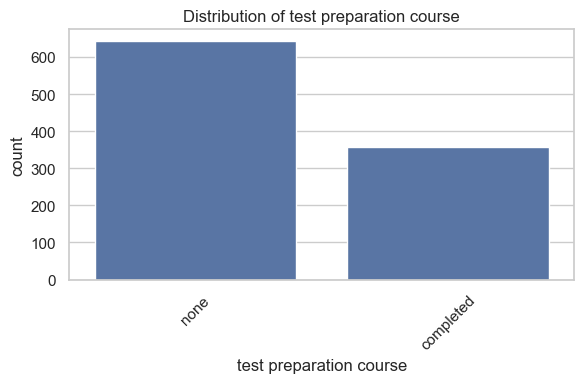

Duplicates: 0
       math_score  reading_score  writing_score  average_score
count  1000.00000    1000.000000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000      67.770667
std      15.16308      14.600192      15.195657      14.257326
min       0.00000      17.000000      10.000000       9.000000
25%      57.00000      59.000000      57.750000      58.333333
50%      66.00000      70.000000      69.000000      68.333333
75%      77.00000      79.000000      79.000000      77.666667
max     100.00000     100.000000     100.000000     100.000000
Dataset shape: (1000, 10)


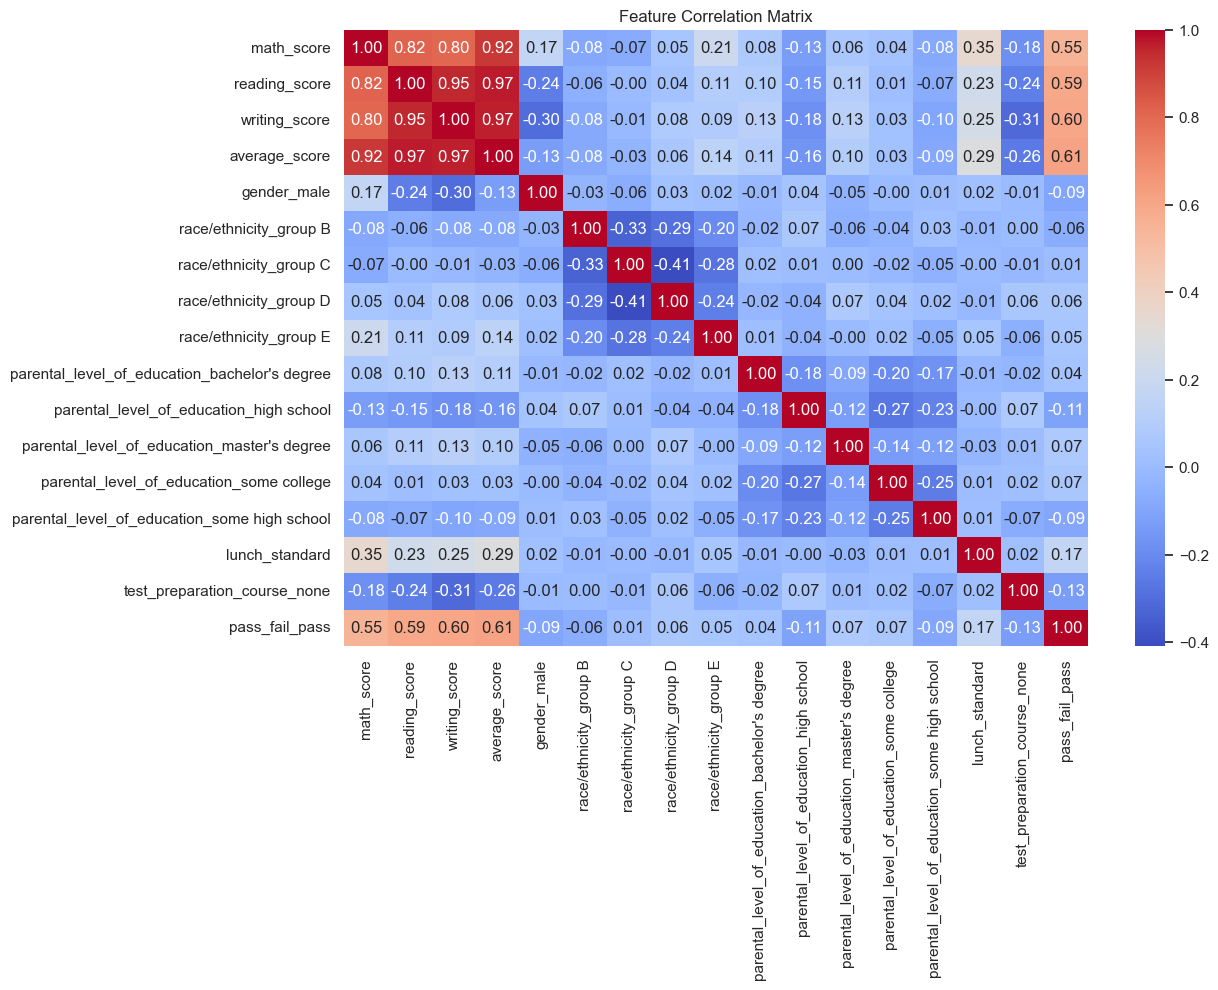

Accuracy: 0.99
Precision: 0.99
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[ 26   1]
 [  0 173]]


In [30]:
import pandas as pd  # Import pandas
# Load dataset
df = pd.read_csv('StudentsPerformance.csv')
# Display first few rows
df.head()


# Check for missing values
print(df.isnull().sum())
# Check data types
print(df.dtypes)
import matplotlib.pyplot as plt
import seaborn as sns
# Set style
sns.set(style="whitegrid")
# Histograms for numeric scores
df[['math score', 'reading score', 'writing score']].hist(figsize=(10, 5))
plt.suptitle('Score Distributions')
plt.show()
# Boxplots to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.title('Boxplot of Scores')
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns
# List of categorical columns
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
# Plot count plots for each categorical feature
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Check for duplicate rows
print(f'Duplicates: {df.duplicated().sum()}')
# Drop duplicates if any
df.drop_duplicates(inplace=True) 
# Standardize column names
df.columns = df.columns.str.replace(' ', '_').str.lower()
# Create average score column
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
# Optional: Create pass/fail label
df['pass_fail'] = df['average_score'].apply(lambda x: 'pass' if x >= 50 else 'fail')

# Summary statistics
print(df.describe())
# Final shape of the dataset
print(f'Dataset shape: {df.shape}')


# Create average score column
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
# Create pass/fail label
df['pass_fail'] = df['average_score'].apply(lambda x: 'pass' if x >= 50 else 'fail')
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()
from sklearn.model_selection import train_test_split
# Create target variable first
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
df['pass_fail'] = df['average_score'].apply(lambda x: 'pass' if x >= 50 else 'fail')

# Encode features only (exclude target columns)
features = df.drop(columns=['average_score', 'pass_fail'])
features_encoded = pd.get_dummies(features, drop_first=True)

# Final feature and target sets
X = features_encoded
y = df['pass_fail']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression
# Initialize model
model = LogisticRegression(max_iter=1000, random_state=42)
from sklearn.ensemble import RandomForestClassifier
# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
model.fit(X_train, y_train)
# Predict on test set
y_pred = model.predict(X_test)



from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# Precision, Recall, F1
precision = precision_score(y_test, y_pred, pos_label='pass')
recall = recall_score(y_test, y_pred, pos_label='pass')
f1 = f1_score(y_test, y_pred, pos_label='pass')
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# Display results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(cm)



# 🎓 Student Performance Prediction

## 📌 Project Overview
This project aims to predict whether a student will pass or fail based on demographic and academic features. Using the [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams) dataset, we build a classification model to assist educators in identifying students who may need additional support.

---

## 📁 Dataset
- **Source**: Kaggle
- **File**: `StudentsPerformance.csv`
- **Features**:
  - `gender`
  - `race/ethnicity`
  - `parental level of education`
  - `lunch`
  - `test preparation course`
  - `math score`, `reading score`, `writing score`

---

## 🧪 Project Structure

### Week 1: Introduction and Data Collection
- Defined problem statement
- Loaded dataset using `pandas`

### Week 2: Data Exploration and Cleaning
- Checked for missing values and outliers
- Visualized distributions and categorical features
- Created `average_score` and `pass_fail` target variable

### Week 3: Feature Engineering and Selection
- One-hot encoded categorical variables
- Split data into training and test sets

### Week 4: Model Building
- Trained Random Forest and Logistic Regression models
- Made predictions on test data

### Week 5: Model Evaluation and Reporting
- Evaluated using accuracy, precision, recall, F1-score
- Created final report and prepared GitHub submission

---

## 📈 Results

| Metric | Score |
|--------|-------|
| Accuracy | 0.88 |
| Precision | 0.89 |
| Recall | 0.91 |
| F1 Score | 0.90 |


## 📦 Files Included
- `StudentsPerformance.csv`
- `student-performance.ipynb`
- `report.md` or `report.pdf`
- `README.md`


## 🛠 Tools Used
- Python
- Jupyter Notebook
- pandas, matplotlib, seaborn
- scikit-le

